# **Project Objectives**

- Determine the level of completeness and the data types provided in the raw data set. If there are null values, what the cleansing strategy will be.
- Determine type of data whether; ratio, interval, nominal or ordinal.
- Group Data set from years 1960 to 2010 
- Identify the variables that are key to understanding the metrics of what makes a winning team. do the correlation table thing first and choose the 8 that are highly correlated. against games_won. what is the style of play. use week 4 lab
- Calculate the descriptive statistics for the 8 variables and plot a histogram and box plot for each varibale. 
- Correlation Analysis

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [34]:
df = pd.read_csv('baseball_teams.csv')

In [35]:
df['Result'] = df['Runs_Scored'] - df['Runs_Against']

In [54]:
df1 = df.iloc[1343:2655, [0,40,19,8,14,15,16,31,32,39]]
df2 = df.iloc[1343:2655, [8,9,14,26,43]]

In [55]:
df1.head()

,Year,Team_Name,Home_Runs,Games_Won,Runs_Scored,At_Bats,Hits,Saves,Infield_Put_Outs,Fielding_Percentage
1343,1960,Baltimore Orioles,123,89,682,5170,1307,22,4125,0.98
1344,1960,Boston Red Sox,124,65,658,5215,1359,23,4083,0.97
1345,1960,Chicago White Sox,112,87,741,5191,1402,26,4143,0.98
1346,1960,Chicago Cubs,119,60,634,5311,1293,25,4206,0.97
1347,1960,Cincinnati Reds,140,67,640,5289,1324,35,4170,0.97


In [56]:
df2.head()

,Games_Won,Games_Lost,Runs_Scored,Runs_Against,Result
1343,89,65,682,606,76
1344,65,89,658,775,-117
1345,87,67,741,617,124
1346,60,94,634,776,-142
1347,67,87,640,692,-52


In [52]:
df1.tail()

,Year,Team Name,Games Won,Games Won,Runs Scored,At Bats,Hits,Saves,Infield Put Outs,Fielding Percentage
2650,2010,St. Louis Cardinals,150,86,736,5542,1456,32,4361,0.984
2651,2010,Tampa Bay Rays,160,96,802,5439,1343,51,4361,0.986
2652,2010,Texas Rangers,162,90,787,5635,1556,46,4366,0.982
2653,2010,Toronto Blue Jays,257,85,755,5495,1364,45,4322,0.985
2654,2010,Washington Nationals,149,69,655,5418,1355,37,4305,0.979


In [57]:
df1.describe()

,Year,Home_Runs,Games_Won,Runs_Scored,At_Bats,Hits,Saves,Infield_Put_Outs,Fielding_Percentage
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,1986.958841,142.350610,79.523628,703.445884,5427.688262,1408.798780,36.162348,4272.016006,0.976398
std,14.413946,40.518801,12.516572,102.107114,364.996582,125.978371,9.363350,282.594688,0.005919
min,1960.000000,32.000000,37.000000,329.000000,3493.000000,797.000000,10.000000,2767.000000,0.960000
25%,1975.000000,113.000000,71.000000,641.000000,5440.750000,1357.000000,30.000000,4300.000000,0.970000
50%,1988.000000,139.000000,80.000000,704.000000,5506.500000,1418.000000,36.000000,4336.500000,0.980000
75%,2000.000000,169.000000,89.000000,771.000000,5575.000000,1489.000000,43.000000,4371.000000,0.980000
max,2010.000000,264.000000,116.000000,1009.000000,5781.000000,1684.000000,68.000000,4518.000000,0.989000


In [58]:
df1 = df1.rename(columns={'Team_Name':'Team Name', 'Fielding_Percentage':'Fielding Percentage',
                   'Home_Runs':'Home Runs','Games_Won':'Games Won',
                   'Runs_Scored':'Runs Scored','Infield_Put_Outs':'Infield Put Outs',
                   'At_Bats':'At Bats', 'Strike_Outs':'Strike Outs'})
df2 = df2.rename(columns={'Games_Won':'Games Won', 'Games_Lost':'Games Lost',
                         'Runs_Scored':'Runs Scored', 'Runs_Against':'Runs Against'})

In [59]:
df1.head()

,Year,Team Name,Home Runs,Games Won,Runs Scored,At Bats,Hits,Saves,Infield Put Outs,Fielding Percentage
1343,1960,Baltimore Orioles,123,89,682,5170,1307,22,4125,0.98
1344,1960,Boston Red Sox,124,65,658,5215,1359,23,4083,0.97
1345,1960,Chicago White Sox,112,87,741,5191,1402,26,4143,0.98
1346,1960,Chicago Cubs,119,60,634,5311,1293,25,4206,0.97
1347,1960,Cincinnati Reds,140,67,640,5289,1324,35,4170,0.97


In [20]:
df1.isna().sum()

Year                   0
Team Name              0
Final Standing         0
Games Won              0
Runs Scored            0
At Bats                0
Hits                   0
Saves                  0
Infield Put Outs       0
Fielding Percentage    0
dtype: int64

In [21]:
df1.loc[df.duplicated()]

,Year,Team Name,Final Standing,Games Won,Runs Scored,At Bats,Hits,Saves,Infield Put Outs,Fielding Percentage


In [22]:
df1.loc[df1.duplicated(subset=['Team Name'])]

,Year,Team Name,Final Standing,Games Won,Runs Scored,At Bats,Hits,Saves,Infield Put Outs,Fielding Percentage
1359,1961,Baltimore Orioles,3,95,691,5481,1393,33,4413,0.980
1360,1961,Boston Red Sox,6,76,729,5508,1401,30,4326,0.970
1361,1961,Chicago White Sox,4,86,765,5556,1475,33,4344,0.980
1362,1961,Chicago Cubs,7,64,689,5344,1364,25,4155,0.970
1363,1961,Cincinnati Reds,1,93,710,5243,1414,40,4110,0.970
...,...,...,...,...,...,...,...,...,...,...
2650,2010,St. Louis Cardinals,2,86,736,5542,1456,32,4361,0.984
2651,2010,Tampa Bay Rays,1,96,802,5439,1343,51,4361,0.986
2652,2010,Texas Rangers,1,90,787,5635,1556,46,4366,0.982
2653,2010,Toronto Blue Jays,4,85,755,5495,1364,45,4322,0.985


In [23]:
df1['Final Standing'].value_counts()

2     228
4     222
3     220
1     220
5     195
6     130
7      50
8      18
9      15
10     14
Name: Final Standing, dtype: int64

In [24]:
df1['Games Won'].value_counts()

83     49
86     47
76     46
79     44
85     43
       ..
106     1
114     1
116     1
43      1
105     1
Name: Games Won, Length: 70, dtype: int64

In [39]:
df1.describe()

,Year,Home_Runs,Games_Won,Runs_Scored,At_Bats,Hits,Saves,Infield_Put_Outs,Fielding_Percentage
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,1986.958841,142.350610,79.523628,703.445884,5427.688262,1408.798780,36.162348,4272.016006,0.976398
std,14.413946,40.518801,12.516572,102.107114,364.996582,125.978371,9.363350,282.594688,0.005919
min,1960.000000,32.000000,37.000000,329.000000,3493.000000,797.000000,10.000000,2767.000000,0.960000
25%,1975.000000,113.000000,71.000000,641.000000,5440.750000,1357.000000,30.000000,4300.000000,0.970000
50%,1988.000000,139.000000,80.000000,704.000000,5506.500000,1418.000000,36.000000,4336.500000,0.980000
75%,2000.000000,169.000000,89.000000,771.000000,5575.000000,1489.000000,43.000000,4371.000000,0.980000
max,2010.000000,264.000000,116.000000,1009.000000,5781.000000,1684.000000,68.000000,4518.000000,0.989000


# These are the Eight Variables of Teams OutPut with their Distribution throughout the 1960 - 2010:

## **1. Teams Performance -  Games Won**

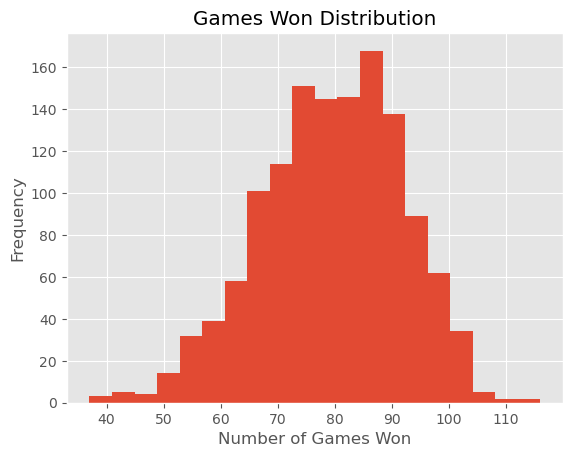

In [28]:
ax = df1['Games Won'].plot(kind='hist', bins=20, title='Games Won Distribution')
ax.set_xlabel('Number of Games Won')
plt.show()

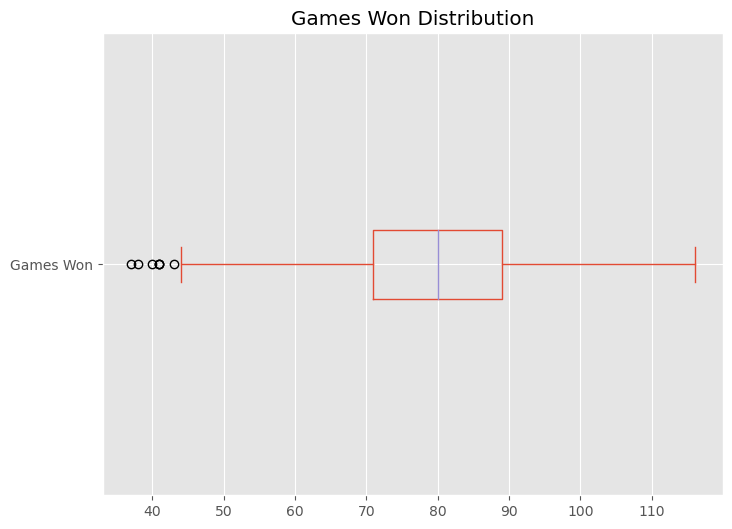

In [29]:
df1['Games Won'].plot(kind='box', vert=False, title='Games Won Distribution', figsize=(8,6))
plt.show()

In [48]:
df1['Games Won'].describe()

,Games Won,Games Won
count,1312.000000,1312.000000
mean,142.350610,79.523628
std,40.518801,12.516572
min,32.000000,37.000000
25%,113.000000,71.000000
50%,139.000000,80.000000
75%,169.000000,89.000000
max,264.000000,116.000000


#### Looking at the Variable Histograms:
- the data has wide range of spread and unimodal
- the distribution is symmetrical and normal with the 
  mean and the median almost identical
- In the box plot there are 5 outliers that are null
  because our calculated statistic shows that the those outliers
  should have been in the range

## **2. Home Runs**

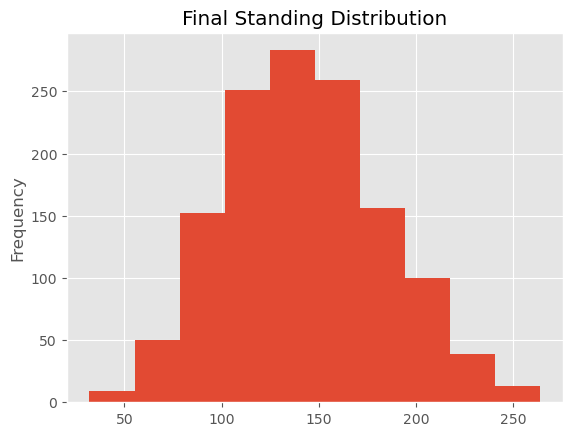

In [60]:
ax = df1['Home Runs'].plot(kind='hist', bins=10, title='Final Standing Distribution')
plt.show()

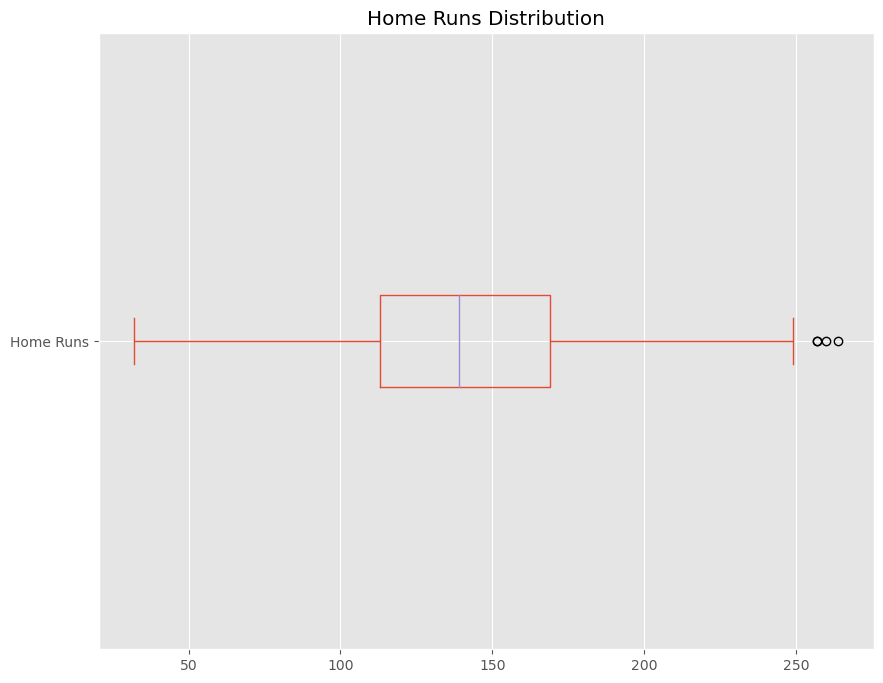

In [62]:
df1['Home Runs'].plot(kind='box', vert=False, title='Home Runs Distribution', figsize=(10,8))
plt.show()

In [61]:
df1['Home Runs'].describe()

count    1312.000000
mean      142.350610
std        40.518801
min        32.000000
25%       113.000000
50%       139.000000
75%       169.000000
max       264.000000
Name: Home Runs, dtype: float64

#### Looking at the Home Runs Histograms:
- the data shows that it is a wide spread.
- It is unimodal
- the graph shows the distribution is normal.
- In the box plot there is outliers, It is right after the value of 250

## **3. Offensive Tactic - Runs Scored**

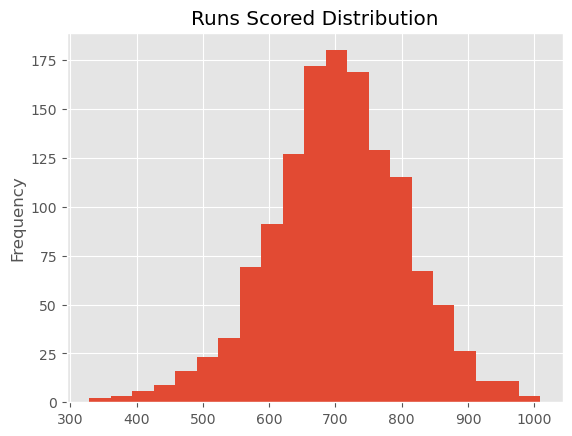

In [54]:
ax = df1['Runs Scored'].plot(kind='hist', bins=21, title='Runs Scored Distribution')
plt.show()

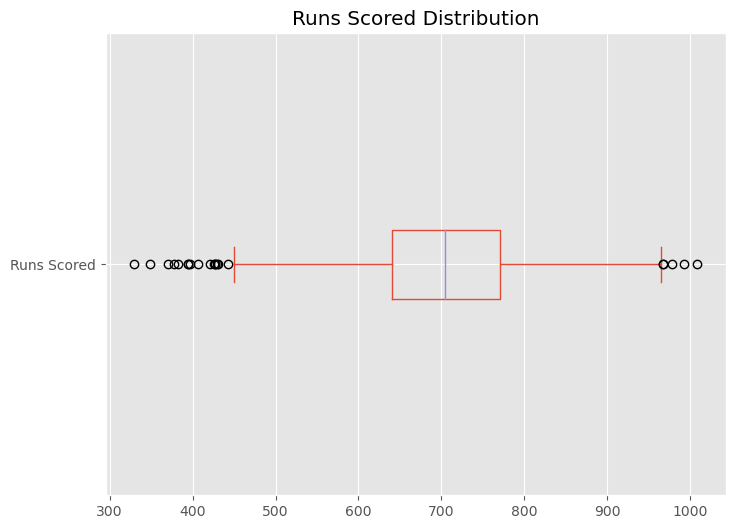

In [55]:
df1['Runs Scored'].plot(kind='box', vert=False, title='Runs Scored Distribution', figsize=(8,6))
plt.show()

In [26]:
df1['Runs Scored'].describe()

count    1312.000000
mean      703.445884
std       102.107114
min       329.000000
25%       641.000000
50%       704.000000
75%       771.000000
max      1009.000000
Name: Runs Scored, dtype: float64

#### Looking at the Runs Scored Histograms:
- Run scored is when a player advances around the bases
  to score.
- It is unimodal and "bell shaped"
- The spread of the distribution is wide
- The distribution is symmetrical and normal with the 
  mean and the median almost identical
- In the box plot there are a lot of outliers because of
  the range. We can determine by this plot that any teams
  that have outputs of less than 450 should be eliminated
  on the list of prospects

## **4. Offensive Tactic - At Bats**

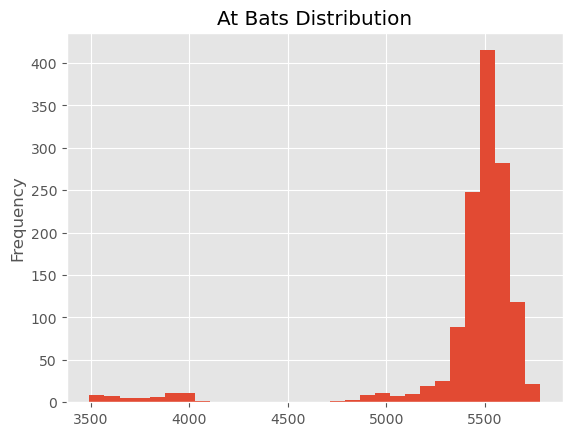

In [30]:
ax = df1['At Bats'].plot(kind='hist', bins=30, title='At Bats Distribution')
plt.show()

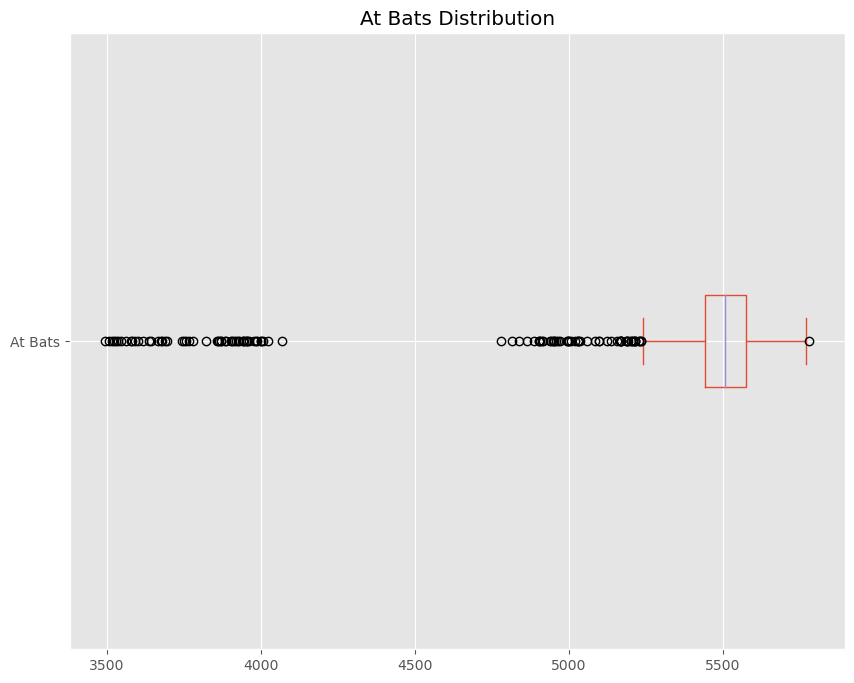

In [28]:
df1['At Bats'].plot(kind='box', vert=False, title='At Bats Distribution', figsize=(10,8))
plt.show()

In [29]:
df1['At Bats'].describe()

count    1312.000000
mean     5427.688262
std       364.996582
min      3493.000000
25%      5440.750000
50%      5506.500000
75%      5575.000000
max      5781.000000
Name: At Bats, dtype: float64

###  Looking at the At Bats Histograms:
- At bats occurs when a batter reaches base by a fielder's
  choice, hit or an error or when a batter is put out on a non-sacrifice
- It is unimodal
 - The spread of the distribution is wide
- The distribution is left skewed because of the range. As more values
  adds near the minimum of the distribution it decreases the value of 
  the mean more strongly than the median.
- this data shows that all of the teams have reached the minimum
  value, this offensive tactic is implemented greatly by each teams
  and we can prove it by the high average count.
- In the box plot there are a lot of outliers because of the input value.

## **5. Offensive Tactic - Hits**

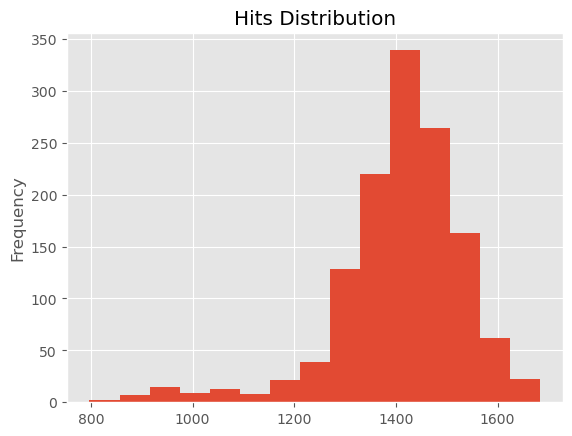

In [32]:
ax = df1['Hits'].plot(kind='hist', bins=15, title='Hits Distribution')
plt.show()

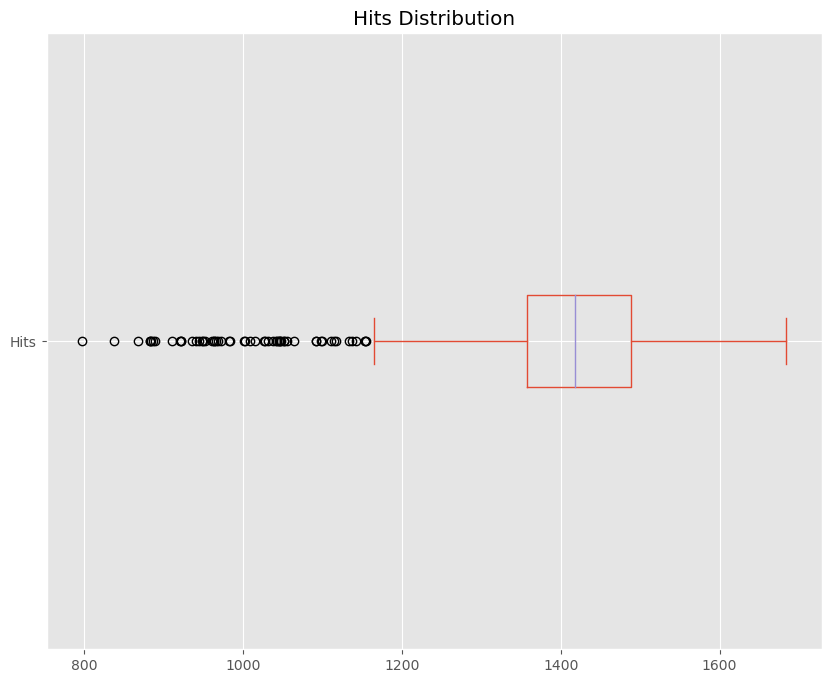

In [117]:
df1['Hits'].plot(kind='box', vert=False, title='Hits Distribution', figsize=(10,8))
plt.show()

In [118]:
df1['Hits'].describe()

count    1312.000000
mean     1408.798780
std       125.978371
min       797.000000
25%      1357.000000
50%      1418.000000
75%      1489.000000
max      1684.000000
Name: Hits, dtype: float64

#### Looking at the Hits Histograms:
- A hit is credited to a batter when batter safely reaches
  or passes first base after hitting the ball into fair
  territory without an error.
 - It is unimodal.
 - The spread of the distribution is wide
- The distribution is left skewed.
- In the box plot there are a lot of outliers mostly under
  the minimum range of the boxplot. We can determine 
  by this plot that what causes these anomallies had great 
  effect to the distribution of the measurement.
- Maybe during this period offensive tactic were dominating but
  the defensive counter measurement causes the teams to
  experience irregularity.

## **6. Defensive Tactic - Saves**

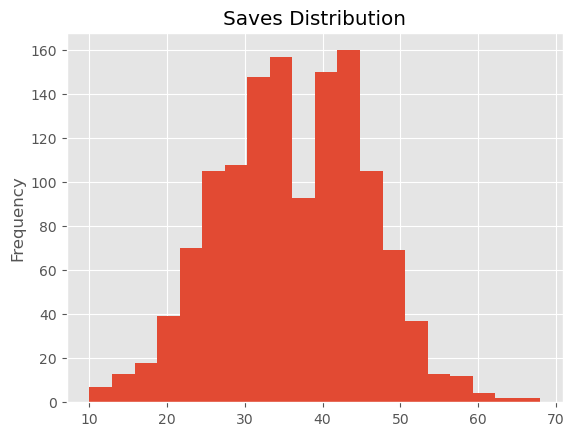

In [119]:
ax = df1['Saves'].plot(kind='hist', bins=20, title='Saves Distribution')

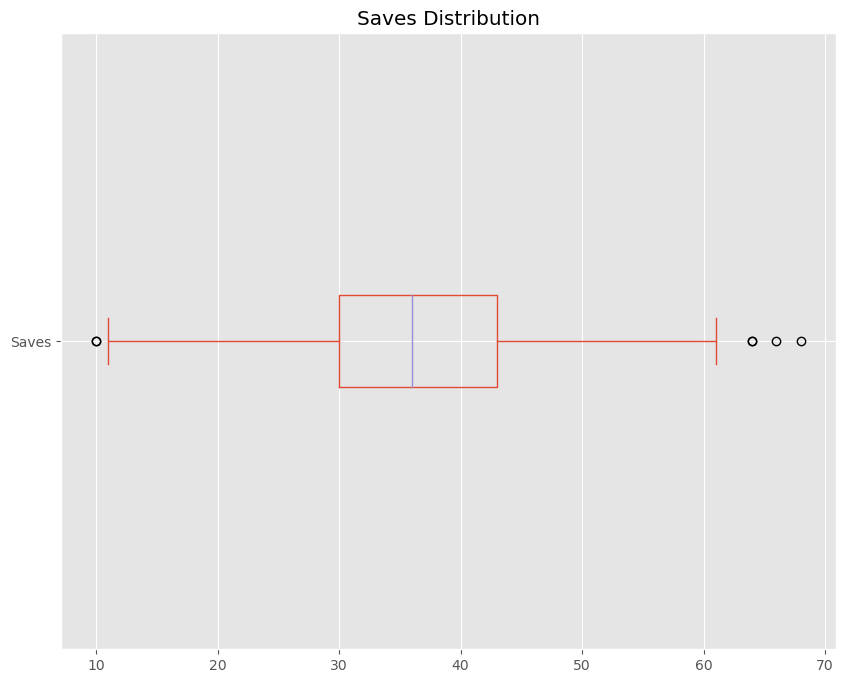

In [120]:
df1['Saves'].plot(kind='box', vert=False, title='Saves Distribution', figsize=(10,8))
plt.show()

In [121]:
df1['Saves'].describe()

count    1312.000000
mean       36.162348
std         9.363350
min        10.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        68.000000
Name: Saves, dtype: float64

#### Looking at the Saves Histograms:
- A save is credited is awarded to the relief pitcher who 
  finishes a game for the winning team, under certain circumstances.
- It is non-symmetric bimodal distribution.
- The spread of the distribution is wide
- In the box plot there are 4 outliers one on the left side of the
  minimum and three on the right of max
  the minimum quartile range of the boxplot.
- Examinig the data, the two peaks is caused by the mean and median
  close to each other. To be more precise and have clear understanding
  where the values from each process fall, it must be calculated by
  shifts to create lower variability. 

## **7. Defensive Tactic - Infield Put Outs**

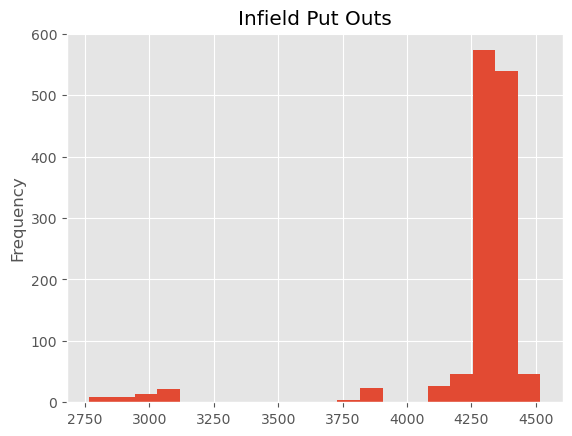

In [122]:
ax = df1['Infield Put Outs'].plot(kind='hist', bins=20, title='Infield Put Outs')

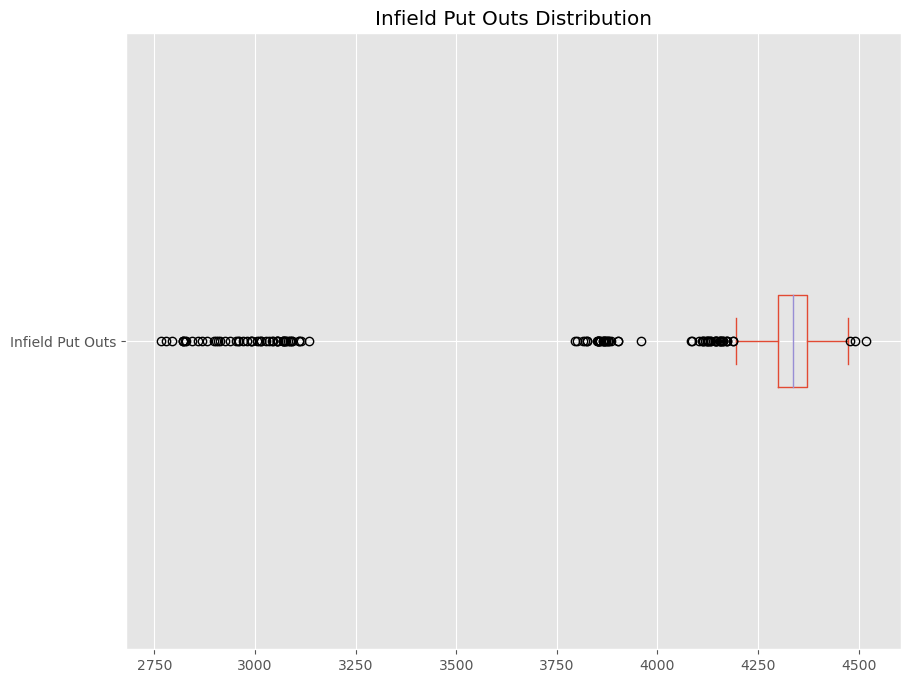

In [123]:
df1['Infield Put Outs'].plot(kind='box', vert=False, title='Infield Put Outs Distribution', figsize=(10,8))
plt.show()

In [124]:
df1['Infield Put Outs'].describe()

count    1312.000000
mean     4272.016006
std       282.594688
min      2767.000000
25%      4300.000000
50%      4336.500000
75%      4371.000000
max      4518.000000
Name: Infield Put Outs, dtype: float64

#### Looking at the Infield Put Outs Histograms:
- A fielder is credited with a putout when he is the fielder who 
  physically records the act of completing an out -- whether it 
  be by stepping on the base for a forceout, tagging a runner, 
  catching a batted ball, or catching a third strike.
- It is unimodal and left-skewed.
- The spread of the distribution is wide
- In the box plot there are a lot of outliers.
- Looking at the diagrams of the data, this tactics average and
  median is relatively close with each other. The distribution 
  is wide yet the meadian and the mean is not far from each other,
  This means that the data type is an interval data.

## **8. Defensive Tactic - Fielding Percentage**

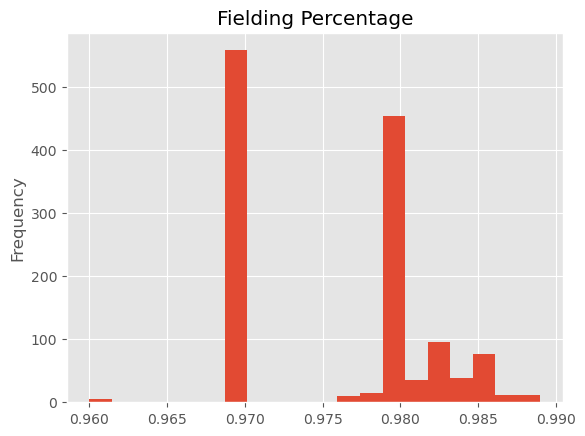

In [125]:
ax = df1['Fielding Percentage'].plot(kind='hist', bins=20, title='Fielding Percentage')

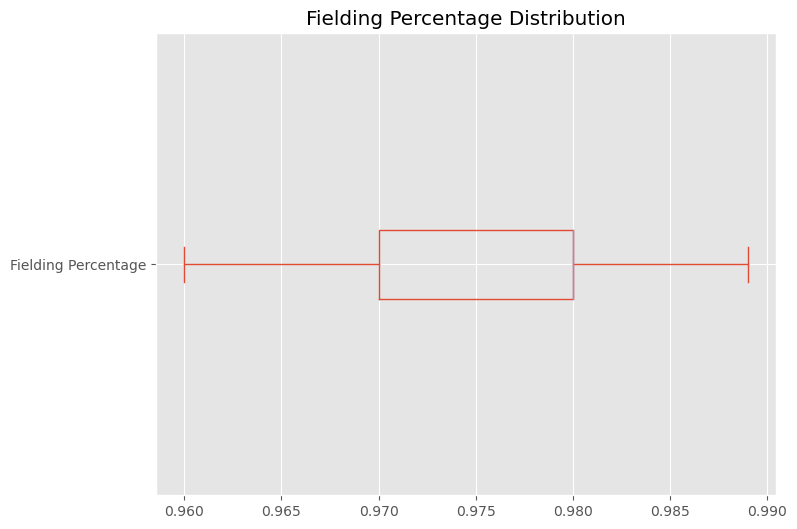

In [126]:
df1['Fielding Percentage'].plot(kind='box', vert=False, title='Fielding Percentage Distribution', figsize=(8,6))
plt.show()

In [127]:
df1['Fielding Percentage'].describe()

count    1312.000000
mean        0.976398
std         0.005919
min         0.960000
25%         0.970000
50%         0.980000
75%         0.980000
max         0.989000
Name: Fielding Percentage, dtype: float64

#### Looking at the Infield Put Outs Histograms:
- Fielding percentage measures the number of successfully fielded 
  balls (putouts and assists) divided by the number of 
  opportunities (putouts, assists, and errors).
- It is non symmetric bimodal distribution.
- The spread of the distribution is narrow.
- In the box plot there are no outliers but in the bar graph we
  can see one outlier, the value of 0.960.
- Looking at the diagrams of the data, the Q3 and median is the 
  the same. I expected an outlier over the max, because increasing
    the stats of this skill would have great impact on winning.

####

#

#                        Correlation Analysis

#

### **Games Won vs Run Scored**

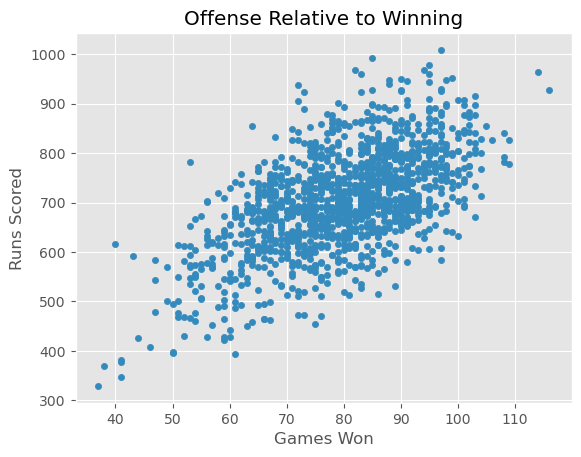

In [62]:
df2.plot(kind='scatter', 
       x='Games Won',
       y='Runs Scored',
       title='Offense Relative to Winning')
plt.show()

The correlation between the games won and the runs scored shows a postive correalation. It seems to be a strong correlation because there are few outliers and and majority of the points are gathered together. This tells us that to win games you have to focus on socring as many runs. As the saying goes, “You can't win a game if you don't score any points.” — John Madden.  

### **Games Won vs Runs Against**

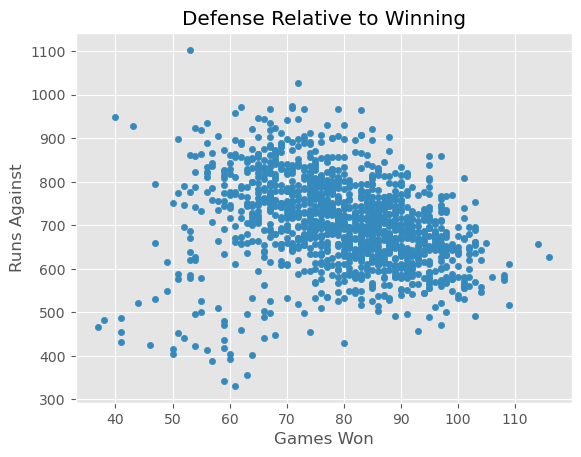

In [63]:
df2.plot(kind='scatter', 
       x='Games Won',
       y='Runs Against',
       title='Defense Relative to Winning')
plt.show()

Games won and runs against have a negative correlation. That also has a quite strong relationship, showing us that you can win games without worrying about conceding runs.

### **Games Won vs (Runs Scored - Runs Against)**

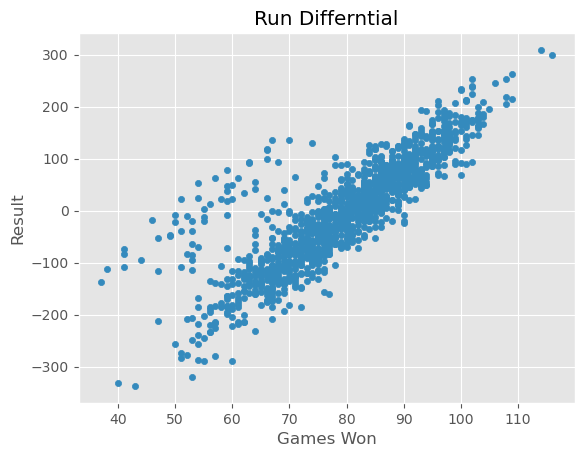

In [30]:
df2.plot(kind='scatter', 
       x='Games Won',
       y='Result',
       title='Run Differntial')
plt.show()

Runs Scored minus Runs Against gives you a measure of the run differential. This is a helpful way of measuring what the effect of the runs mean for the result of the game. A postive run differential means the team is performing well. Its a way to judge a team on its offense and defense. If a team has a high run differential, their chances of going all the way seem higher. This is shown in the correlation between games won and the run differential. It has a strong postive correlation.

### **Games Lost vs Runs Scored**

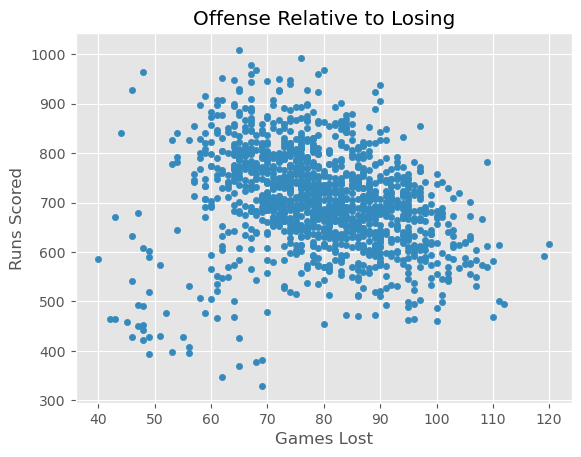

In [66]:
df2.plot(kind='scatter', 
       x='Games Lost',
       y='Runs Scored',
       title='Offense Relative to Losing')
plt.show()

Games lost and runs scored has a postive correlation, but is weak. This tells us that you in going for runs, you still have to keep your defense tight otherwise, the game will be lost. 

### **Games Lost vs Runs Against**

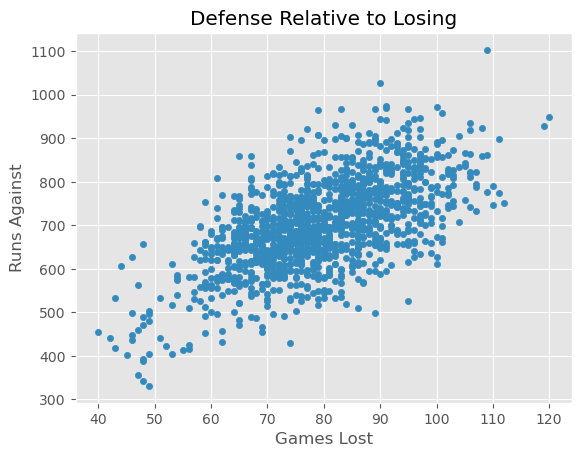

In [67]:
df2.plot(kind='scatter', 
       x='Games Lost',
       y='Runs Against',
       title='Defense Relative to Losing')
plt.show()

Ganes lost and runs against has a strong postive correlation. This tells us that the more runs you concede, the more likely you are to loose the game. 

### **Games Lost vs (Runs Scored - Runs Against)**

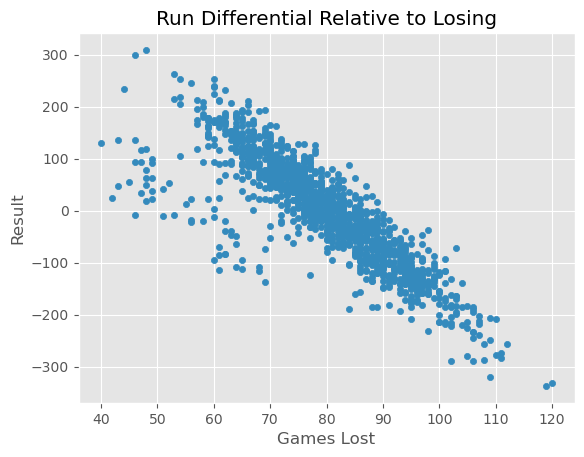

In [31]:
df2.plot(kind='scatter', 
       x='Games Lost',
       y='Result',
       title='Run Differential Relative to Losing')
plt.show()

Games Lost and the run differential has a strong negative correlation. This tells us that when your runs against outweigh your runs won, you have a negative run differential. With a negative run differential, you are more likely to loose games.

# Project Report

The purpose of this project was to explore and analyze a dataset to gain insights and identify any correlations between variables. The objectives were as follows:

To understand the structure and characteristics of the dataset.
To identify key variables that may have an impact on the outcome of interest.
To perform correlation analysis to determine the relationships between variables.
To present the major findings and insights to inform decision-making.

In our Data Exploration, We have observed that there is some columns (Unnamed) that had no value or Nan, Calculatig the descriptive statistics gives our data a guide to what data should be standardize in the future and it allows the outliers on data to be obvious. The accuracy of the data is important because it affects our output to produce value. The data is vague with the calculation of descriptive statistics. Skewness and kurtosis should be added to provide more secutiy to the data accuracy.

The 'ggplot' function was effective in visualizing the data but it is still not precise to where you can identify the exact index position because of the data values range. By visualing both barplot and boxplot it gives a different perspective on analyzing the variable which is very useful. Scatter plot was effective in showing mutual relationship of two variables especially when calculation was adopted to provide a result.


#

# Names:                                                                      
##    Jann Ligason                                                                
##    Bubune Eli Dzantor
##
# Group: 7